In [1]:
# import pandas
import pandas as pd

#import numpy
import numpy as np


#import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#creating Dataframe object
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_data.info()
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in column Age ,Cabin and Embarked. To handle this we find mean value for Age column and drop Cabin Column. For Embarked column we use mode method.

In [8]:
np.mean(titanic_data["Age"])

29.69911764705882

In [9]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [11]:
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [12]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [13]:
titanic_data.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now there is no null values present.

Now we will replace the catagorical data of sex and Embarked column into numeric data.

In [14]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [15]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


# Making DataFrame for the Nominal Data

In [16]:
titanic_data_visualization_nominal=titanic_data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].copy()

# Visualization of Data

for visualization of data we will use countplot method of seaborn.

In [17]:
import seaborn as sns

0    577
1    314
Name: Sex, dtype: int64


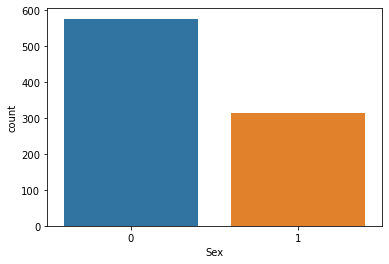

In [18]:
ax=sns.countplot(x="Sex",data=titanic_data_visualization_nominal)
print(titanic_data_visualization_nominal['Sex'].value_counts())

from the above observation the total number of male(0) is 577 and female is 314

0    549
1    342
Name: Survived, dtype: int64


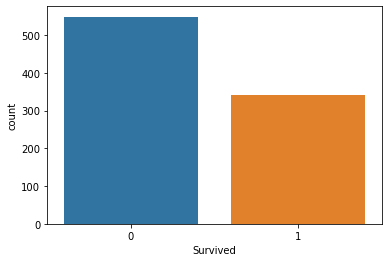

In [19]:
ax=sns.countplot(x="Survived",data=titanic_data_visualization_nominal)
print(titanic_data_visualization_nominal['Survived'].value_counts())

from the above observation the total number of Survived person is 549 and died is 342.

3    491
1    216
2    184
Name: Pclass, dtype: int64


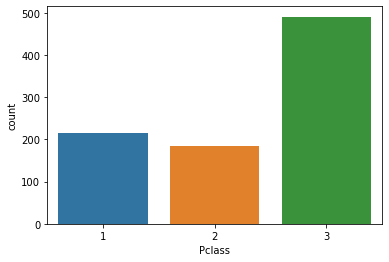

In [20]:
ax=sns.countplot(x="Pclass",data=titanic_data_visualization_nominal)
print(titanic_data_visualization_nominal['Pclass'].value_counts())

In total data first class passanger is 216, second class is 184 and third class is 491.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


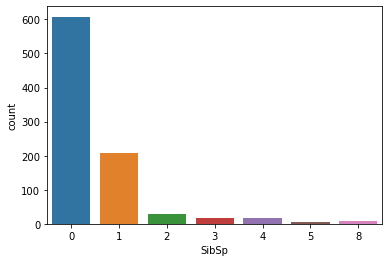

In [21]:
ax=sns.countplot(x="SibSp",data=titanic_data_visualization_nominal)
print(titanic_data_visualization_nominal['SibSp'].value_counts())

0    646
1    168
2     77
Name: Embarked, dtype: int64


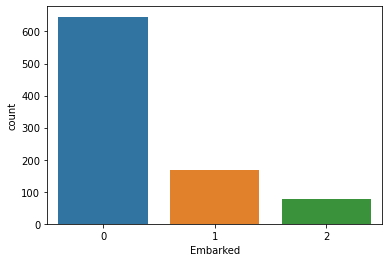

In [22]:
ax=sns.countplot(x="Embarked",data=titanic_data_visualization_nominal)
print(titanic_data_visualization_nominal['Embarked'].value_counts())

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


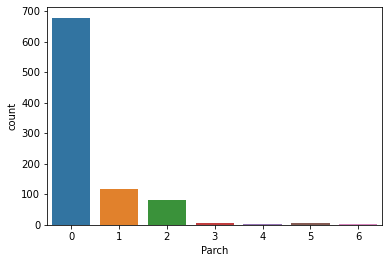

In [23]:
ax=sns.countplot(x="Parch",data=titanic_data_visualization_nominal)
print(titanic_data_visualization_nominal['Parch'].value_counts())

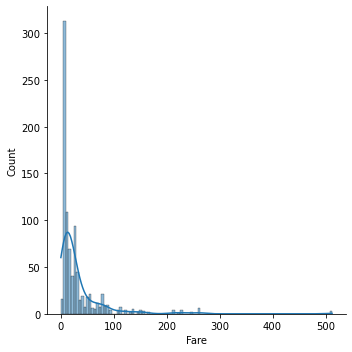

In [24]:
sns.displot(titanic_data_visualization_nominal['Fare'],kde=True)

By this plot we can say that most of the people has low fare.

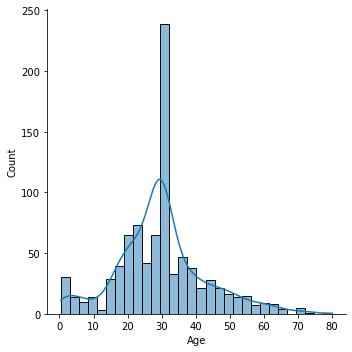

In [25]:
sns.displot(titanic_data_visualization_nominal['Age'],kde=True)

By this plot we can say that the age of most of the passengers are in between 20 to 50.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

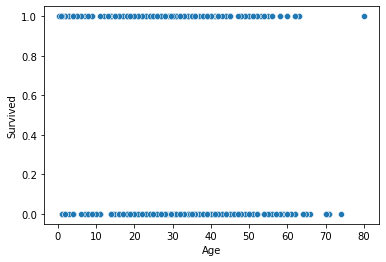

In [26]:
import seaborn as sns
sns.scatterplot(x="Age",y="Survived",data=titanic_data)

By this Scatterplot we observe that passengers whose age is more than 60 will not be able to survive. and approx equal number of the passengers were survived or dead between 0 to 50 age.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

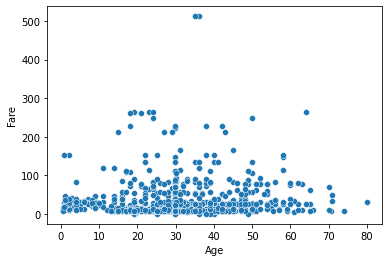

In [27]:
import seaborn as sns
sns.scatterplot(x="Age",y="Fare",data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

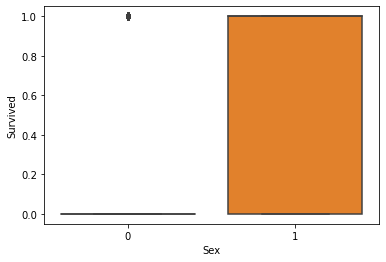

In [28]:
sns.boxplot(x="Sex",y="Survived",data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

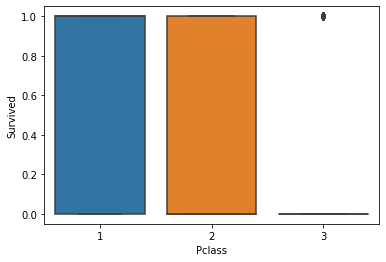

In [29]:
sns.boxplot(x="Pclass",y="Survived",data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

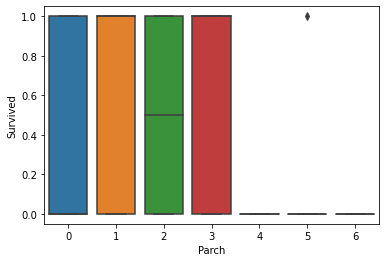

In [30]:
sns.boxplot(x="Parch",y="Survived",data=titanic_data)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

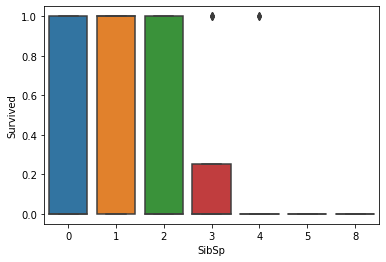

In [31]:
sns.boxplot(x="SibSp",y="Survived",data=titanic_data)

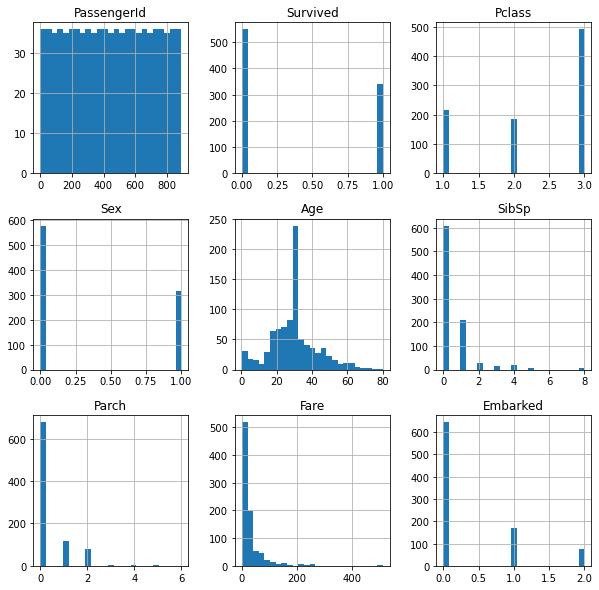

In [32]:
titanic_data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

# Correlation

In [33]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

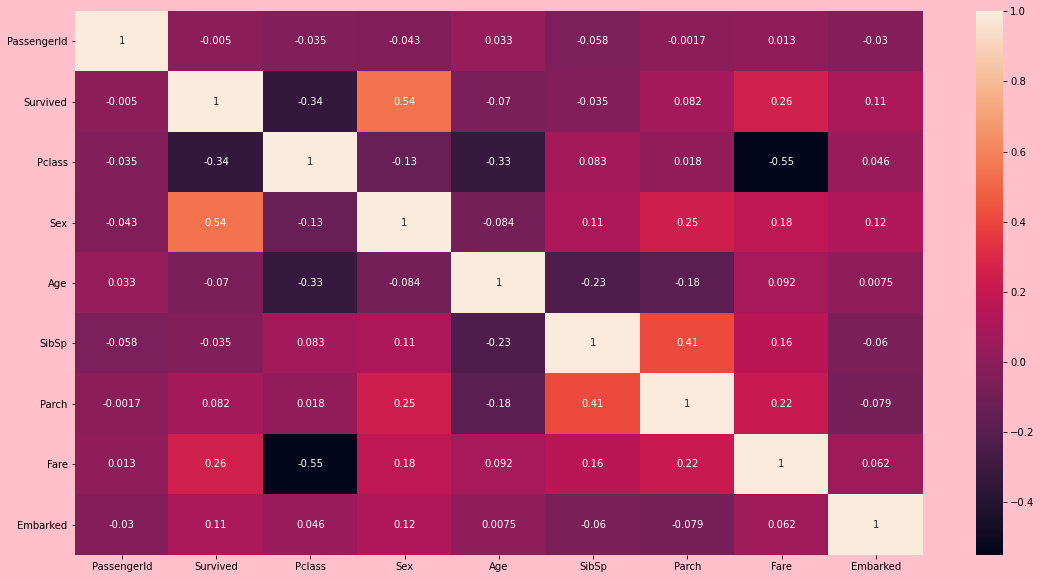

In [34]:
# plotting heatmap
plt.figure(figsize=[19,10],facecolor='pink')
sns.heatmap(titanic_data.corr(),annot=True)

By Correlation we will find the relation between different column to target column. sex and survived column are highly corelated. Pclass and survived column are not corelated with each other.

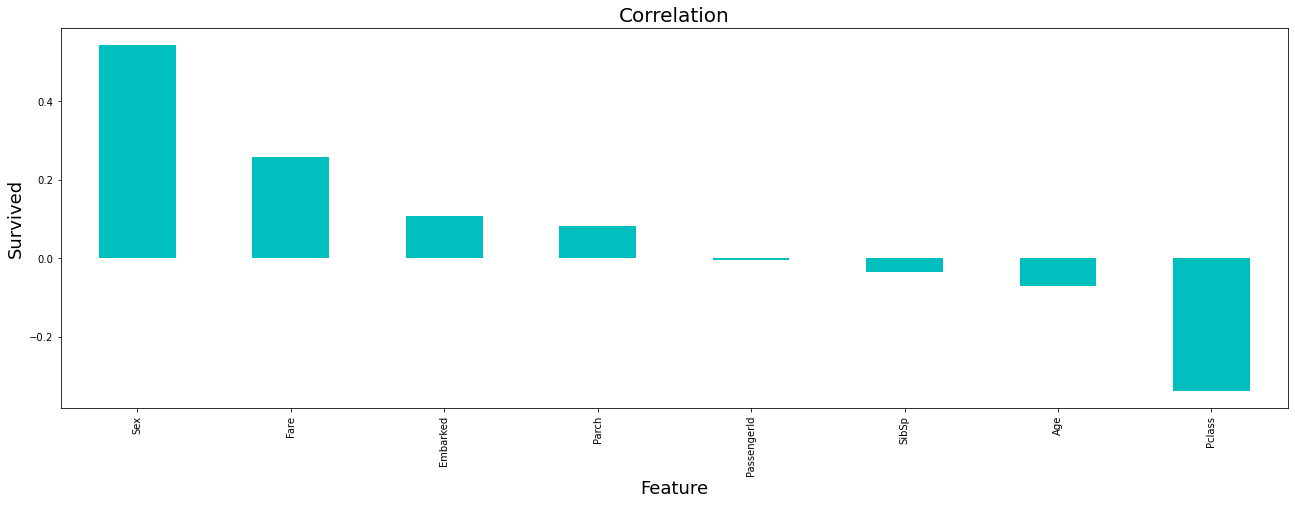

In [35]:
plt.figure(figsize=(22,7))
titanic_data.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Survived',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

By this we can say that sex, fare, Embarked and parch are in positive relation and Sibsp ,age and Pclass are in negative relation.

In [36]:
titanic_data= titanic_data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [37]:
titanic_data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [38]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [39]:
from sklearn.preprocessing import power_transform
titanic=power_transform(titanic_data)

titanic_data=pd.DataFrame(titanic_data,columns=titanic_data.columns)

In [40]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(titanic_data))
z.shape

(891, 8)

In [41]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [42]:
len(np.where(z>3)[0])

72

In [43]:
titanic_new=titanic_data.drop([  13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885],axis=0)
titanic_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


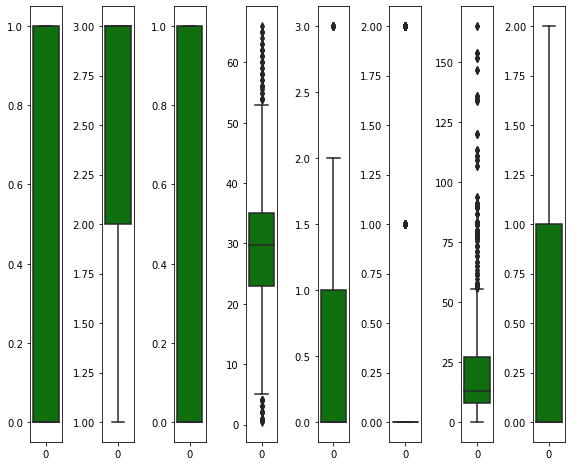

In [44]:
import seaborn as sns
collist=titanic_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= titanic_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers are present in sex and parch.

In [45]:
x = titanic_data.drop(columns = ['Survived'],axis=1)
y = titanic_data['Survived']

# Scalling the data using Min-Max Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.8715083798882681 on random state 6


We saw that we get 87% accuracy at random state 6

In [49]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(random_state = 6)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 6)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 6)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =6 )
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=6)
    forest.fit(x_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [50]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8132022471910112
[1]K Nearest Neighbor Training Accuracy: 0.7808988764044944
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8019662921348315
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6671348314606742
[4]Gaussian Naive Bayes Training Accuracy: 0.7991573033707865
[5]Decision Tree Classsifier Training Accuracy: 0.9859550561797753
[6]Random Forest Classifier Training Accuracy: 0.9747191011235955


In [51]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=6)
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=6)

# Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, (TP + TN) / (TP + TN + FN +FP)))
    cr=classification_report(y_test,model[i].predict(x_test))
    print(cr)
    print('\n')

[[93 20]
 [24 42]]
Model[0] Testing Accuracy = "0.7541899441340782 !"
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       113
           1       0.68      0.64      0.66        66

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



[[83 30]
 [23 43]]
Model[1] Testing Accuracy = "0.7039106145251397 !"
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       113
           1       0.59      0.65      0.62        66

    accuracy                           0.70       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.71      0.70      0.71       179



[[90 23]
 [26 40]]
Model[2] Testing Accuracy = "0.7262569832402235 !"
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       113
           1       0.63

# Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation score of LR is:",scr.mean())

cross validation score of LR is: 0.7934906785512522


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of Random Forest Classifier is:",scr.mean())

cross validation score of Random Forest Classifier is: 0.8114870378507313


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of Decision Tree Classifieris:",scr.mean())

cross validation score of Decision Tree Classifieris: 0.7677546921097231


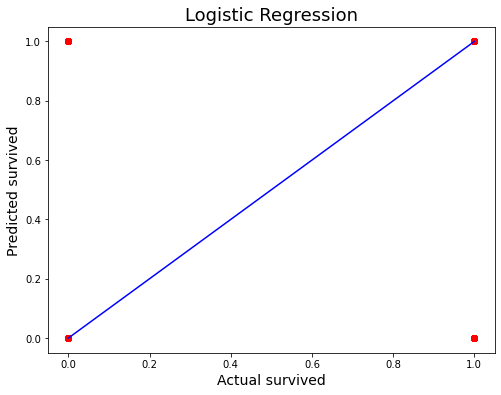

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual survived',fontsize=14)
plt.ylabel('Predicted survived',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Hyper Tunning Parameter

In [57]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [58]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}

In [59]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8435754189944135

# AUC-ROC Curve

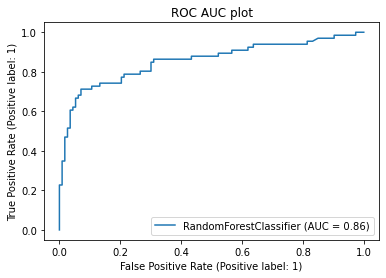

In [60]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Conclusion

In [61]:
import pickle
filename='Titanic.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [62]:
import pickle
loaded_model=pickle.load(open('Titanic.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.35754189944134


In [63]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["Predicted","original"])

In [64]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,1,1,0,0,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
original,1,1,0,0,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
